## Burst model definition
Code to find the synaptic weights and taus such that the HH point cell bursts

In [1]:
import sys
import numpy as np
import random
import pandas as pd
from neuron import h
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
sys.path.insert(1, "../utils/")
import HH, Stimuli

In [6]:
sim_duration = 25000
sims = {
    'base':{},
    'half_weight':{},
    'long_tau':{},
    'long_tau_half_weight':{},
    'burst':{}
}

e_times = Stimuli.poisson_process_duration(5, sim_duration)
i_times = Stimuli.poisson_process_duration(15, sim_duration)

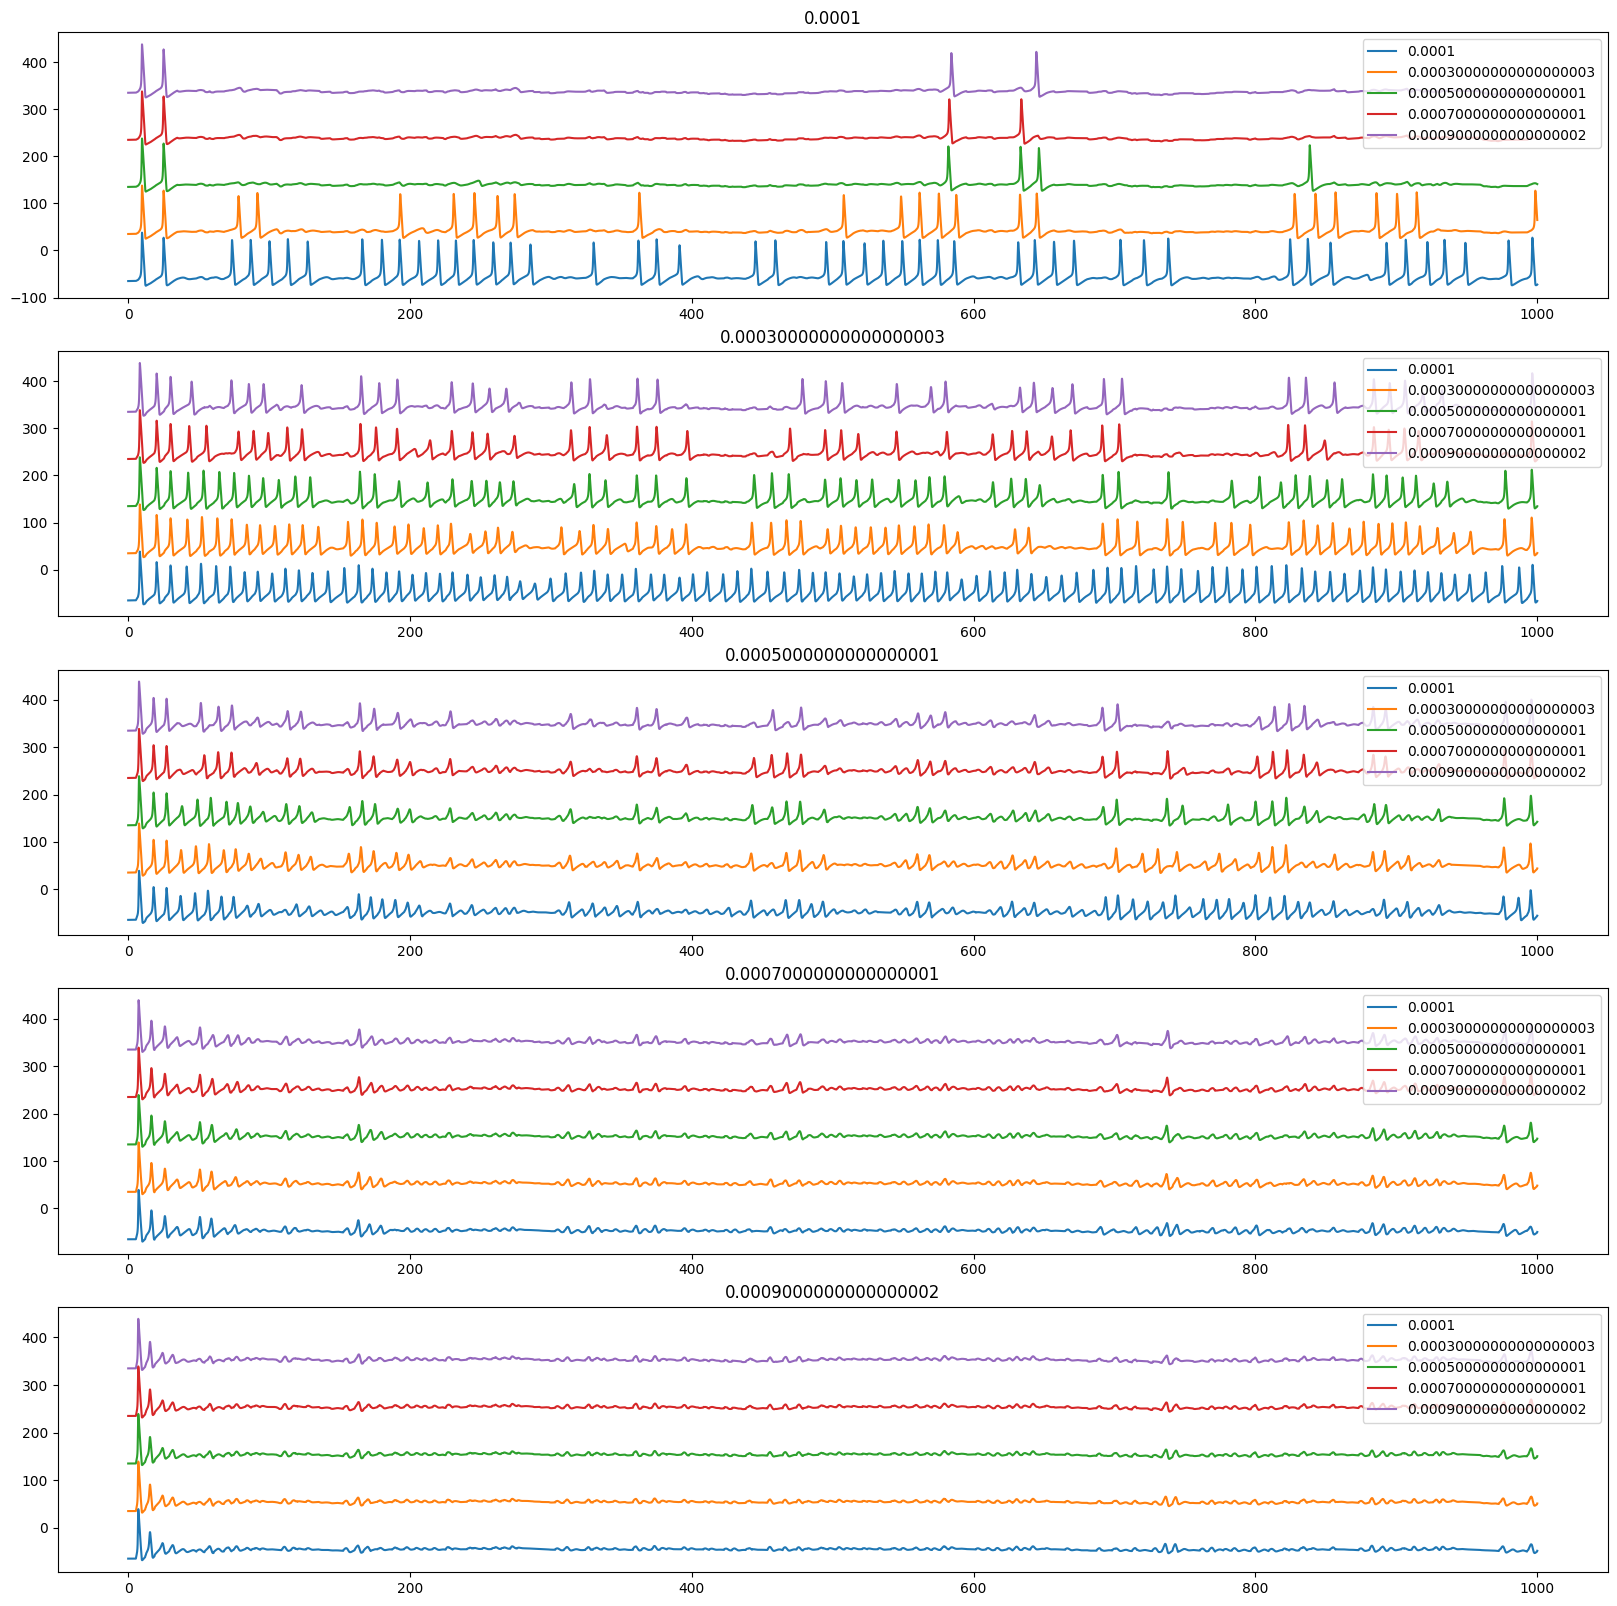

In [3]:
fig, axes = plt.subplots(5,1, figsize=(20,20))

for i, e_weight in enumerate(np.arange(0.0001, 0.001, 0.0002)):
    for j, i_weight in enumerate(np.arange(0.0001, 0.001, 0.0002)):
        sim = HH.HH()
        e_stims = Stimuli.PoissonStim(
            name='base', 
            stim_id = 'na',
            interval = 5,
            rev_potential = 0,
            weight = e_weight,
            tau = 50,
            seed = 'na',
            stim_times = e_times
        )
        i_stims = Stimuli.PoissonStim(
            name='base', 
            stim_id = 'na',
            interval = 15,
            rev_potential = -80,
            weight = i_weight,
            tau = 40,
            seed = 'na',
            stim_times = i_times
        )

        sim.add_custom_stimulus(e_stims)
        sim.add_custom_stimulus(i_stims)
        sim.run_simulation(1000)

        axes[i].plot(sim._t, sim._v+(j*100))
        axes[i].set_title(f'{e_weight}')
    axes[i].legend(np.arange(0.0001, 0.001, 0.0002))

plt.show()

In [13]:
np.arange(20, 45, 5)

array([15, 20, 25, 30, 35, 40, 45])

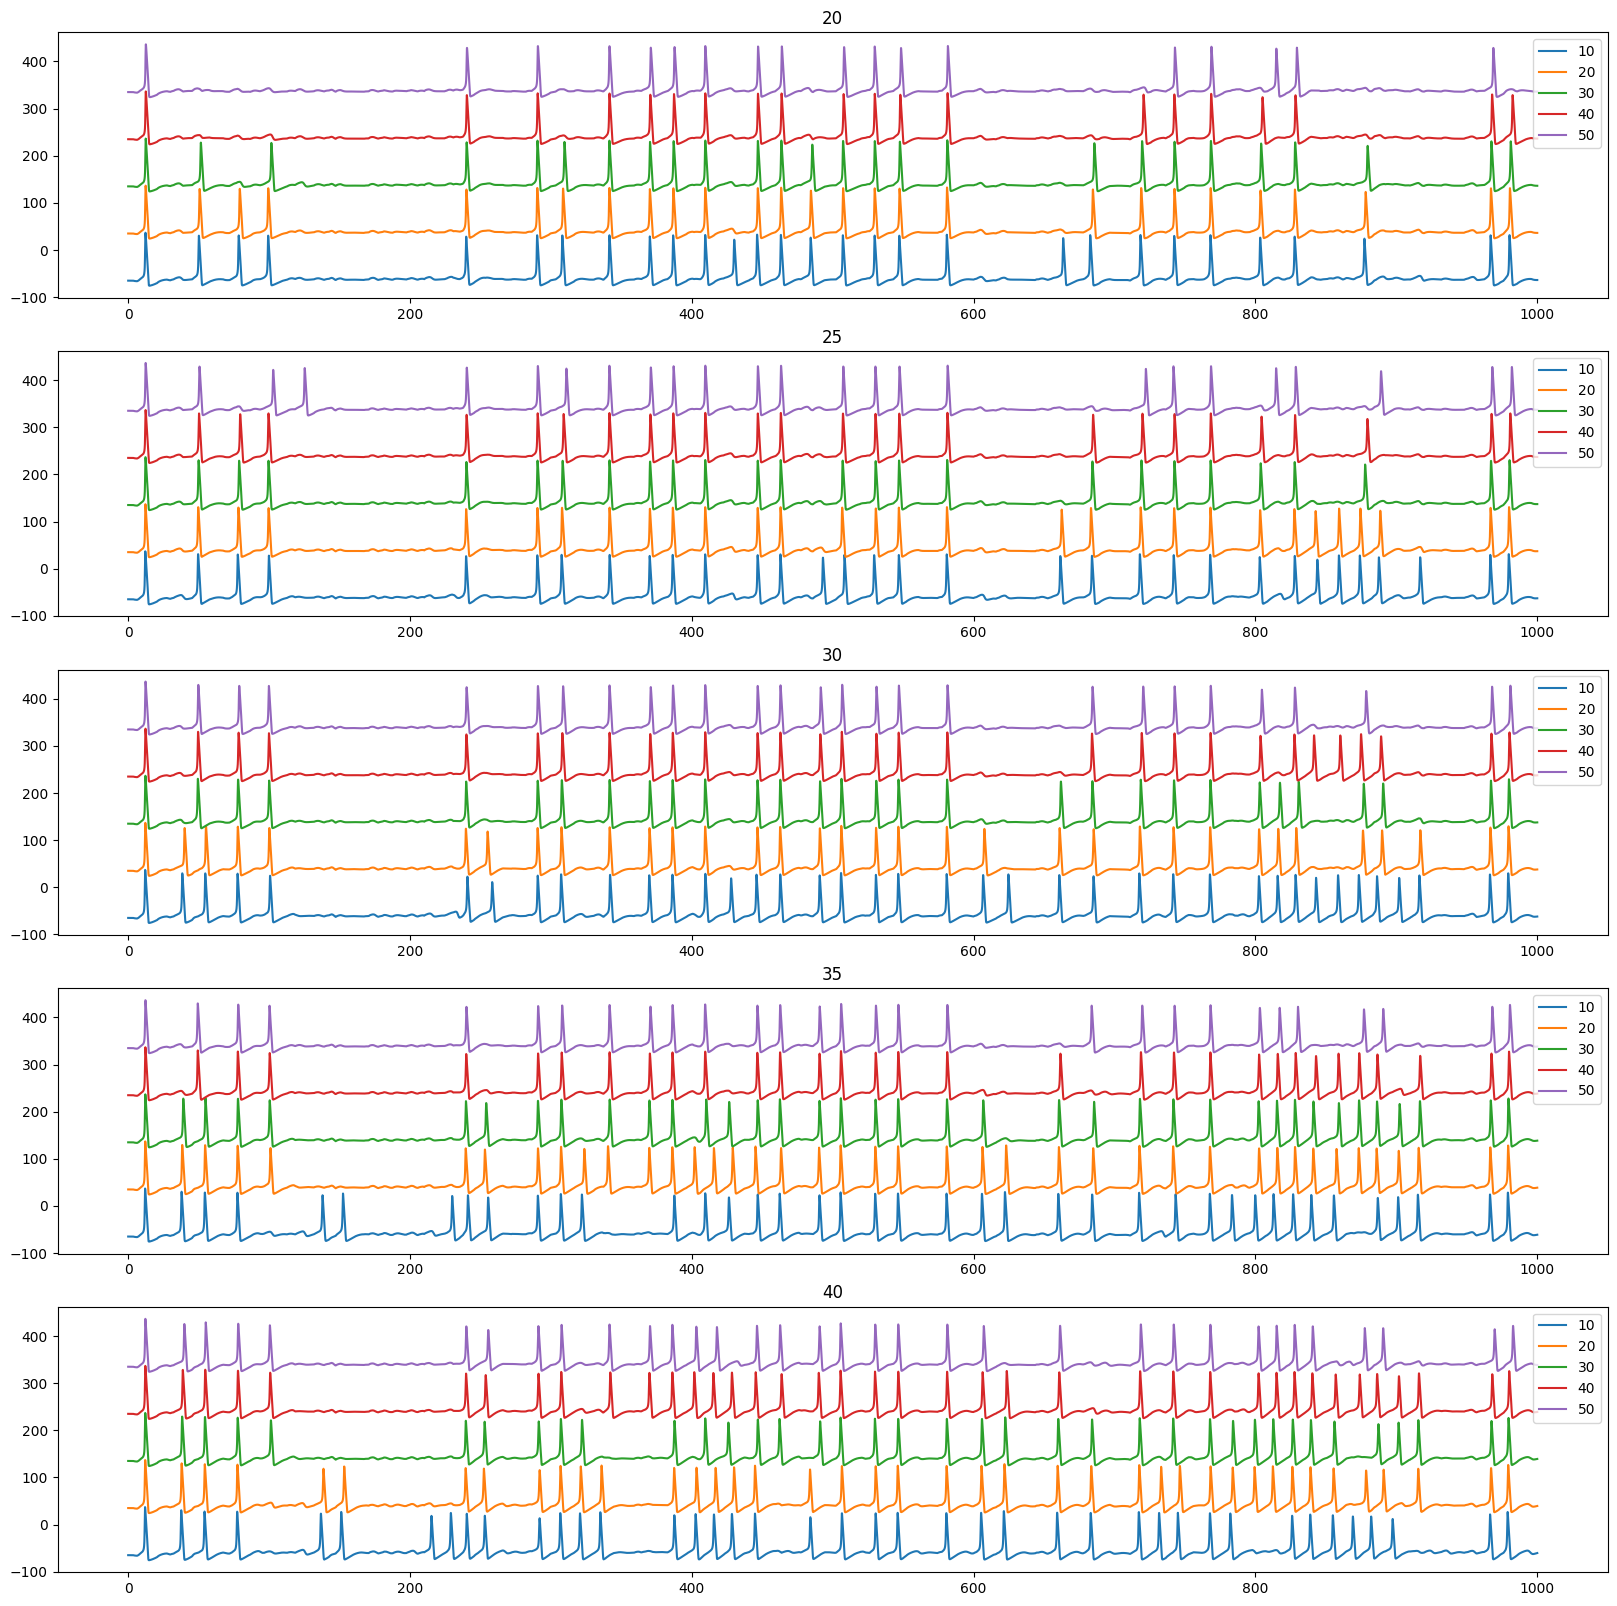

In [15]:
fig, axes = plt.subplots(5,1, figsize=(20,20))

for i, e_tau in enumerate(np.arange(20, 45, 5)):
    for j, i_tau in enumerate(np.arange(20, 45, 5)):
        sim = HH.HH()
        e_stims = Stimuli.PoissonStim(
            name='base', 
            stim_id = 'na',
            interval = 5,
            rev_potential = 0,
            weight = 0.0001,
            tau = e_tau,
            seed = 'na',
            stim_times = e_times
        )
        i_stims = Stimuli.PoissonStim(
            name='base', 
            stim_id = 'na',
            interval = 15,
            rev_potential = -80,
            weight = 0.0002,
            tau = i_tau,
            seed = 'na',
            stim_times = i_times
        )

        sim.add_custom_stimulus(e_stims)
        sim.add_custom_stimulus(i_stims)
        sim.run_simulation(1000)

        axes[i].plot(sim._t, sim._v+(j*100))
        axes[i].set_title(f'{e_tau}')
    axes[i].legend(np.arange(10, 51, 10))

plt.show()

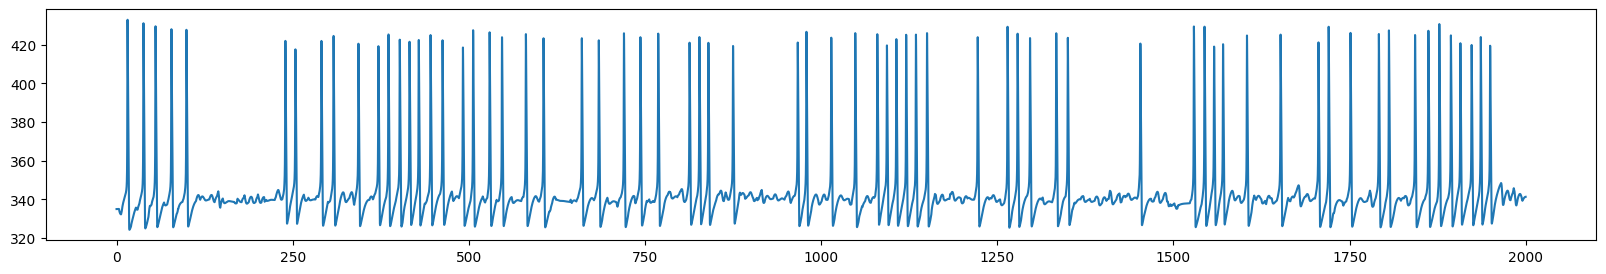

In [36]:
sim_dur = 2000

sim = HH.HH()
e_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = 0.0001,
    tau = 40,
    seed = 'na',
    stim_times = e_times
)
i_stims = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = 0.0005,
    tau = 20,
    seed = 'na',
    stim_times = i_times
)

sim.add_custom_stimulus(e_stims)
sim.add_custom_stimulus(i_stims)
sim.run_simulation(sim_dur)

plt.figure(figsize=(20,3))
plt.plot(sim._t, sim._v+(j*100))

plt.show()